In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

In [3]:
burn_lc = pd.read_csv('../results/19jan2020_15nuc/15nuc_m60_burnup_learning_curve.csv')
#enri_lc = pd.read_csv('../results/19jan2020_15nuc/15nuc_m60_enrichment_learning_curve.csv')
#cool_lc = pd.read_csv('../results/19jan2020_15nuc/15nuc_m60_cooling_learning_curve.csv')
rxtr_lc = pd.read_csv('../results/19jan2020_15nuc/15nuc_m60_reactor_learning_curve.csv')

In [4]:
burn_lc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
#enri_lc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
#cool_lc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_lc.loc[:, 'Parameter'] = 'Reactor Type'

In [10]:
burn_lc.loc[burn_lc['Algorithm']=='knn', :]
#rxtr_lc.loc[(rxtr_lc['Algorithm']=='knn')]

,TrainSizeFrac,AbsTrainSize,TrainScore,TrainStd,CV-Score,CV-Std,Algorithm,Parameter
0,0.10,476,1.0,0.0,0.996051,0.000542,knn,Burnup [MWd/MTU]
1,0.20,952,1.0,0.0,0.997590,0.000275,knn,Burnup [MWd/MTU]
2,0.30,1428,1.0,0.0,0.998128,0.000097,knn,Burnup [MWd/MTU]
3,0.40,1904,1.0,0.0,0.998407,0.000089,knn,Burnup [MWd/MTU]
4,0.50,2380,1.0,0.0,0.998604,0.000094,knn,Burnup [MWd/MTU]
5,0.55,2618,1.0,0.0,0.998685,0.000112,knn,Burnup [MWd/MTU]
6,0.60,2856,1.0,0.0,0.998759,0.000137,knn,Burnup [MWd/MTU]
7,0.65,3094,1.0,0.0,0.998829,0.000134,knn,Burnup [MWd/MTU]
8,0.70,3332,1.0,0.0,0.998899,0.000136,knn,Burnup [MWd/MTU]
9,0.75,3570,1.0,0.0,0.998961,0.000139,knn,Burnup [MWd/MTU]


# Learning Curves By Prediction Type

In [11]:
def plot_learning_curve(df, title, fig, ax):
    
    train_sizes = df['AbsTrainSize']
    train_frac = df['TrainSizeFrac']
    train_scores_mean = df['TrainScore']
    train_scores_std = df['TrainStd']
    test_scores_mean = df['CV-Score']
    test_scores_std = df['CV-Std']
    
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Training Set Size', fontsize=14)
    # for burnup
    ax.set_xlim(250, 5000)
    # for everything else
    #ax.set_xlim(1000, 12100)
    ax.tick_params(labelsize=14)
    
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color = med[0], 
                     alpha=0.2)
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color = med[1], 
                     alpha=0.2)
    ax.plot(train_sizes, train_scores_mean, 'o-', color=med[0], mew=0, ms=5, 
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color=med[1], mew=0, ms=5,
             label="Cross-validation score")
    
    # Double x axis
    #ax2 = ax.twiny()
    #ax2.set_xlim(ax.get_xlim())
    #ax2.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9])
    #ax2.set_xticklabels(train_frac)
    #ax2.set_xlabel('Fraction of Training Set', fontsize=12)
    
    return fig

In [15]:
def plot_by_prediction(df):
    fig, alg_ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(17, 5))
    knn = ['knn', 'k-Nearest Neighbors', alg_ax[0]]
    dtree = ['dtree', 'Decision Trees', alg_ax[1]]
    svr = ['svr', 'Support Vectors', alg_ax[2]]
    for alg, title, ax in [knn, dtree, svr]:
        lc = df.loc[(df['Algorithm']==alg)]
        plot_learning_curve(lc, title, fig, ax)
        
    alg_ax[0].set_ylabel('Score', fontsize=16)
    ax.set_ylim(0.98, 1.001)
    parameter = df.loc[0, 'Parameter']
    title = 'Learning Curves using Three Algorithms: ' + parameter + ' Prediction'
    fig.suptitle(title, fontsize=24)
    fig.subplots_adjust(top=.8)
    alg_ax[1].legend(loc='center', bbox_to_anchor=(0.5, -0.23), ncol=2)
    fig.show()
    return fig

In [8]:
plt.close(fig)

NameError: name 'fig' is not defined

## Reactor Type

/home/opotowsky/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


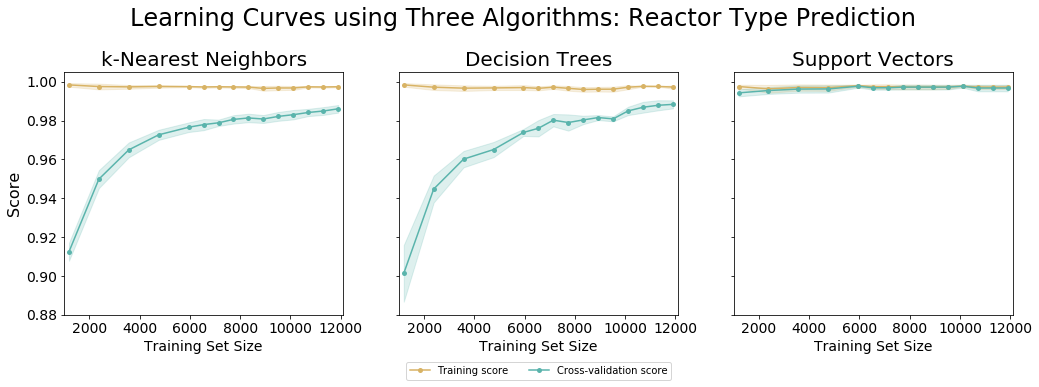

In [9]:
fig = plot_by_prediction(rxtr_lc)
#fig.savefig('../results/19jan2020_15nuc/graphs/rxtr_learning.png', bbox_inches='tight', transparent=True)

## Burnup

/home/opotowsky/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


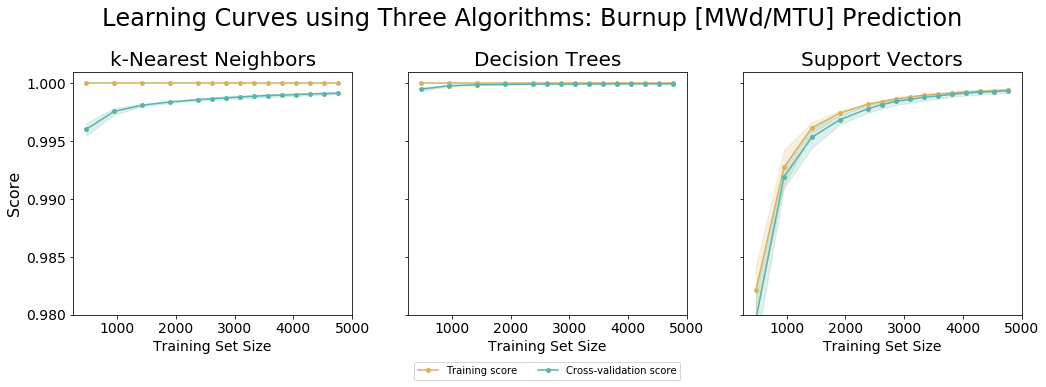

In [16]:
plt.close(fig)
fig = plot_by_prediction(burn_lc)
#fig.savefig('../results/19jan2020_15nuc/graphs/burn_learning.png', bbox_inches='tight', transparent=True)

## Enrichment

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


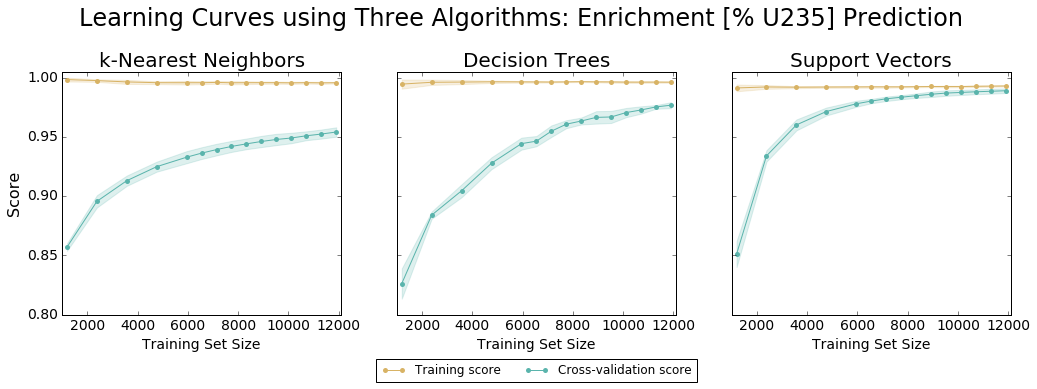

In [231]:
plt.close(fig)
fig = plot_by_prediction(enri_lc)
fig.savefig('../results/4oct2018/graphs/enri_learning.png', bbox_inches='tight', transparent=True)

## Cooling Time

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


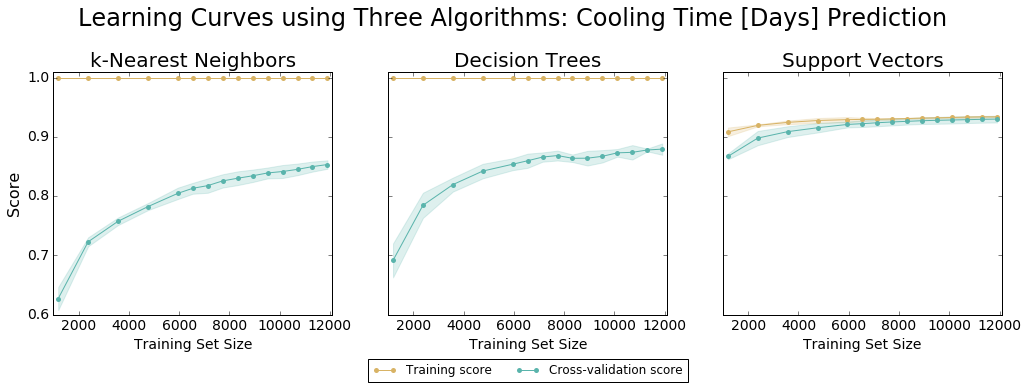

In [210]:
plt.close(fig)
fig = plot_by_prediction(cool_lc)
fig.savefig('../results/4oct2018/graphs/cool_learning.png', bbox_inches='tight', transparent=True)